In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_pd = pd.read_csv('/Users/msyzdykova/Desktop/dataset DS project/final scraped df/final_df_new.csv')

In [3]:
data_pd

,Unnamed: 0,Player,Nation,Pos,Squad,Age,90s,Standard_Gls,Standard_Sh,Standard_SoT,...,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,League,Market Value
0,0,William Saliba,FRA,DF,Arsenal,22.0,38.0,2,10,3,...,26,0,1,0,213,72,49,0.595,EPL,80000000.0
1,1,James Tarkowski,ENG,DF,Everton,30.0,38.0,1,25,4,...,42,0,1,0,186,140,61,0.697,EPL,13000000.0
2,2,Joachim Andersen,DEN,DF,Crystal Palace,27.0,37.9,2,21,8,...,35,0,0,0,193,89,46,0.659,EPL,35000000.0
3,3,Florian Lejeune,FRA,DF,Rayo Vallecano,32.0,37.0,3,67,21,...,25,0,0,1,173,80,49,0.620,La Liga,3000000.0
4,4,Dominic Solanke,ENG,FW,Bournemouth,25.0,36.9,19,106,35,...,11,1,0,0,97,97,135,0.418,EPL,45000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,615,Andrey Santos,BRA,MF,Nott'ham Forest,19.0,0.1,0,2,0,...,0,0,0,0,0,0,0,0.000,EPL,18000000.0
616,616,César Tárrega,ESP,DF,Valencia,21.0,0.1,0,0,0,...,0,0,0,0,0,0,0,0.000,La Liga,4000000.0
617,617,Mikey Moore,ENG,MF,Tottenham,15.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0.000,EPL,1000000.0
618,618,Donny van de Beek,NED,DF,Manchester Utd,26.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0.000,EPL,5000000.0


In [4]:
data_pd.isnull().values.any()

False

In [55]:
#data_pd = pd.get_dummies(data_pd, columns=['Pos'])
#data_pd = pd.get_dummies(data_pd, columns=['League'])

train_df, test_df = train_test_split(data_pd, test_size=0.25, random_state=123)

dropped_columns = ['Unnamed: 0', 'Player', 'Nation', 'Squad', 'Market Value']

data_pd['CountryESP'] = (data_pd['Nation'] == 'ESP').astype(int)
data_pd['CountryENG'] = (data_pd['Nation'] == 'ENG').astype(int)
data_pd['CountryOther'] = ((data_pd['Nation'] != 'ESP') & (data_pd['Nation'] != 'ENG')).astype(int)

train_df_dropped_cols = train_df.drop(dropped_columns, axis=1)
train_arr = train_df_dropped_cols.to_numpy()
test_df_dropped_cols = test_df.drop(dropped_columns, axis=1)
test_arr = test_df_dropped_cols.to_numpy()

train_features_sc = StandardScaler()
train_features_norm = train_features_sc.fit_transform(train_arr)

test_features_norm = train_features_sc.transform(test_arr)

train_mktval = train_df['Market Value'].to_numpy().reshape(-1, 1)
test_mktval = test_df['Market Value'].to_numpy().reshape(-1, 1)
train_mktval_sc = StandardScaler()
train_mktval_norm = train_mktval_sc.fit_transform(train_mktval)
test_mktval_norm = train_mktval_sc.transform(test_mktval)

# DT with outliers

In [56]:
dtr = DecisionTreeRegressor(random_state=123)

param_grid = {
    'max_depth': [1, 3, 5],          
    'min_samples_split': [10, 20],       
    'min_samples_leaf': [10, 20], 
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5,                              
    verbose=1,
    n_jobs=-1                          
)

grid_search.fit(train_features_norm, train_mktval_norm)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

predictions = best_model.predict(test_features_norm)
test_rmse = np.sqrt(mean_squared_error(test_mktval_norm, predictions))

train_pred=best_model.predict(train_features_norm)
train_rmse=np.sqrt(mean_squared_error(train_mktval_norm, train_pred))

test_r2 = r2_score(test_mktval_norm, predictions)
train_r2 = r2_score(train_mktval_norm, train_pred)

print(f"Test RMSE: {test_rmse}")
print(f"Train RMSE: {train_rmse}")
print(f"Test R2: {test_r2}")
print(f"Train R2: {train_r2}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10}
Test RMSE: 0.8660853983139725
Train RMSE: 0.75636829259623
Test R2: 0.4235978552587011
Train R2: 0.4279070059550639


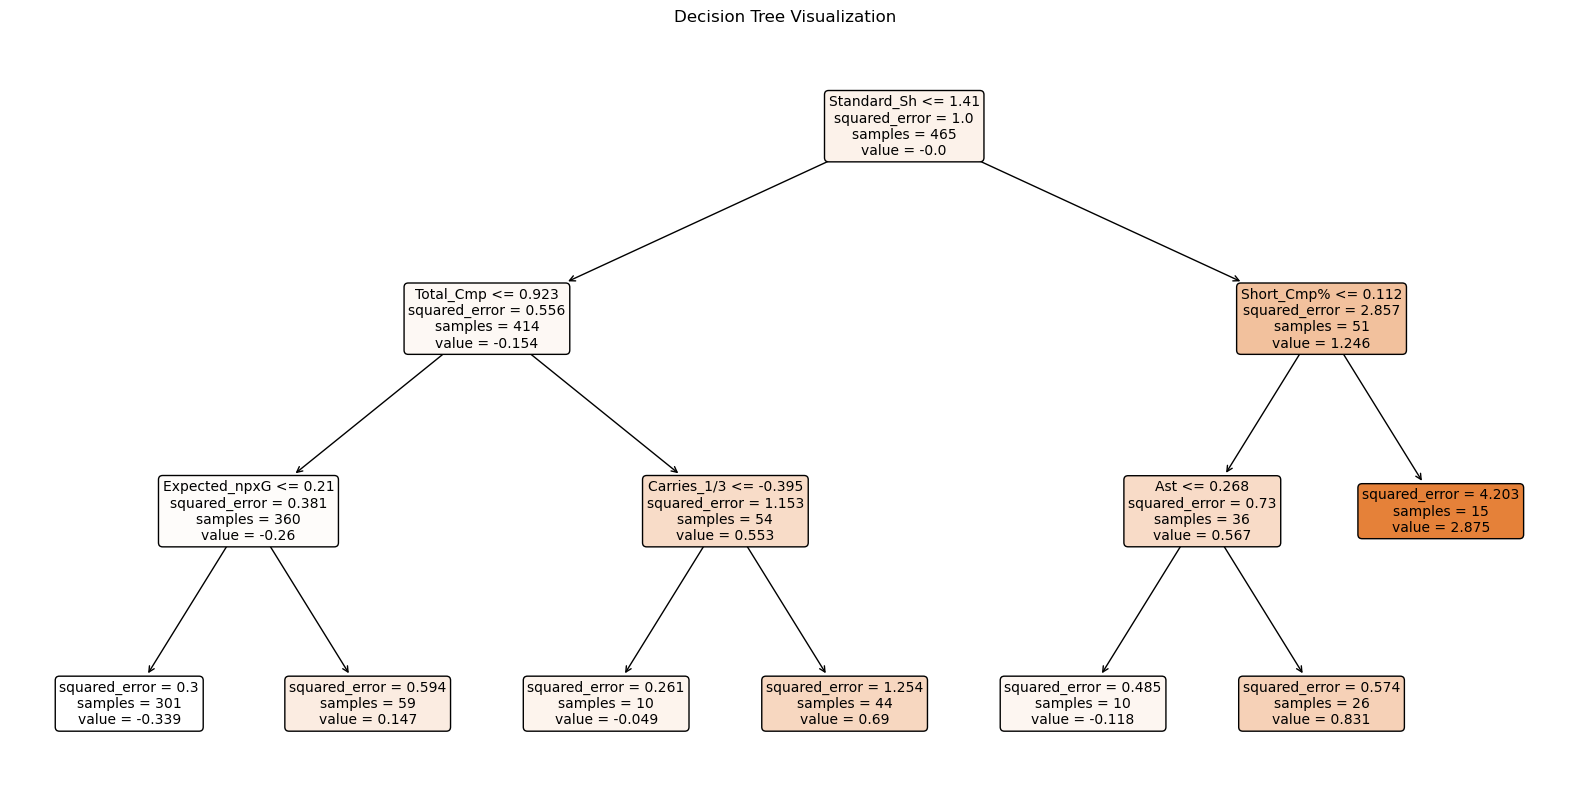

In [57]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=train_df_dropped_cols.columns,  # Use feature names from the dataset
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [58]:
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': train_df_dropped_cols.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [59]:
importance_df[importance_df['Importance']>0]

,Feature,Importance
3,Standard_Sh,0.447000
26,Short_Cmp%,0.283408
19,Total_Cmp,0.155939
15,Expected_npxG,0.058535
33,Ast,0.032717
90,Carries_1/3,0.022401


# Without the outliers

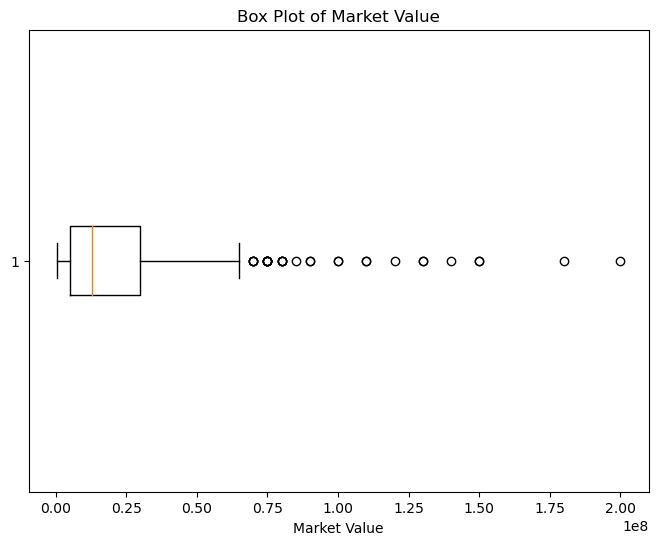

In [10]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_pd['Market Value'], vert=False)
plt.title('Box Plot of Market Value')
plt.xlabel('Market Value')
plt.show()

In [11]:
Q1 = data_pd['Market Value'].quantile(0.25)
Q3 = data_pd['Market Value'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outlier=data_pd[(data_pd['Market Value'] >= lower_bound) & (data_pd['Market Value'] <= upper_bound)]
print(len(data_pd))
print(len(df_no_outlier))

620
590


In [12]:
df_no_outlier

,Unnamed: 0,Player,Nation,Squad,Age,90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,...,Aerial Duels_Won%,Market Value,Pos_DF,Pos_FW,Pos_MF,League_EPL,League_La Liga,CountryESP,CountryENG,CountryOther
1,1,James Tarkowski,ENG,Everton,30.0,38.0,1,25,4,0.160,...,0.697,13000000.0,1,0,0,1,0,0,1,0
2,2,Joachim Andersen,DEN,Crystal Palace,27.0,37.9,2,21,8,0.381,...,0.659,35000000.0,1,0,0,1,0,0,0,1
3,3,Florian Lejeune,FRA,Rayo Vallecano,32.0,37.0,3,67,21,0.313,...,0.620,3000000.0,1,0,0,0,1,0,0,1
4,4,Dominic Solanke,ENG,Bournemouth,25.0,36.9,19,106,35,0.330,...,0.418,45000000.0,0,1,0,1,0,0,1,0
6,6,Antonee Robinson,USA,Fulham,25.0,36.3,0,16,7,0.438,...,0.609,25000000.0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,615,Andrey Santos,BRA,Nott'ham Forest,19.0,0.1,0,2,0,0.000,...,0.000,18000000.0,0,0,1,1,0,0,0,1
616,616,César Tárrega,ESP,Valencia,21.0,0.1,0,0,0,0.000,...,0.000,4000000.0,1,0,0,0,1,1,0,0
617,617,Mikey Moore,ENG,Tottenham,15.0,0.0,0,0,0,0.000,...,0.000,1000000.0,0,0,1,1,0,0,1,0
618,618,Donny van de Beek,NED,Manchester Utd,26.0,0.0,0,1,0,0.000,...,0.000,5000000.0,1,0,0,1,0,0,0,1


In [13]:
df_no_outlier.drop(columns=['Unnamed: 0', 'Player', 'Nation', 'Squad'], inplace=True)

/var/folders/rs/h0v3ycrs5879js66dwdsz4jc0000gn/T/ipykernel_52880/3143660197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier.drop(columns=['Unnamed: 0', 'Player', 'Nation', 'Squad'], inplace=True)


In [30]:
print(len(train_arr_no_outl))
print(len(test_arr_no_outl))

295
295


In [32]:
df_no_outlier

,Age,90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,...,Aerial Duels_Won%,Market Value,Pos_DF,Pos_FW,Pos_MF,League_EPL,League_La Liga,CountryESP,CountryENG,CountryOther
1,30.0,38.0,1,25,4,0.160,0.66,0.11,0.04,0.25,...,0.697,13000000.0,1,0,0,1,0,0,1,0
2,27.0,37.9,2,21,8,0.381,0.55,0.21,0.10,0.25,...,0.659,35000000.0,1,0,0,1,0,0,0,1
3,32.0,37.0,3,67,21,0.313,1.81,0.57,0.04,0.14,...,0.620,3000000.0,1,0,0,0,1,0,0,1
4,25.0,36.9,19,106,35,0.330,2.87,0.95,0.16,0.49,...,0.418,45000000.0,0,1,0,1,0,0,1,0
6,25.0,36.3,0,16,7,0.438,0.44,0.19,0.00,0.00,...,0.609,25000000.0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,19.0,0.1,0,2,0,0.000,22.50,0.00,0.00,0.00,...,0.000,18000000.0,0,0,1,1,0,0,0,1
616,21.0,0.1,0,0,0,0.000,0.00,0.00,0.00,0.00,...,0.000,4000000.0,1,0,0,0,1,1,0,0
617,15.0,0.0,0,0,0,0.000,0.00,0.00,0.00,0.00,...,0.000,1000000.0,0,0,1,1,0,0,1,0
618,26.0,0.0,0,1,0,0.000,30.00,0.00,0.00,0.00,...,0.000,5000000.0,1,0,0,1,0,0,0,1


In [63]:
train_df, test_df = train_test_split(df_no_outlier, test_size=0.5, random_state=123)

dropped_columns = ['Market Value']

train_df_dropped_cols = train_df.drop(dropped_columns, axis=1)
train_arr = train_df_dropped_cols.to_numpy()
test_df_dropped_cols = test_df.drop(dropped_columns, axis=1)
test_arr = test_df_dropped_cols.to_numpy()

train_features_sc = StandardScaler()
train_features_norm = train_features_sc.fit_transform(train_arr)

test_features_norm = train_features_sc.transform(test_arr)

train_mktval = train_df['Market Value'].to_numpy().reshape(-1, 1)
test_mktval = test_df['Market Value'].to_numpy().reshape(-1, 1)
train_mktval_sc = StandardScaler()
train_mktval_norm = train_mktval_sc.fit_transform(train_mktval)
test_mktval_norm = train_mktval_sc.transform(test_mktval)


dtr = DecisionTreeRegressor(random_state=123)

param_grid = {
    'max_depth': [1, 3, 5],          
    'min_samples_split': [10, 20],       
    'min_samples_leaf': [10, 20], 
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5,                              
    verbose=1,
    n_jobs=-1                          
)

grid_search.fit(train_features_norm, train_mktval_norm)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

predictions = best_model.predict(test_features_norm)
test_rmse = np.sqrt(mean_squared_error(test_mktval_norm, predictions))

train_pred=best_model.predict(train_features_norm)
train_rmse=np.sqrt(mean_squared_error(train_mktval_norm, train_pred))

test_r2 = r2_score(test_mktval_norm, predictions)
train_r2 = r2_score(train_mktval_norm, train_pred)

print(f"Test RMSE: {test_rmse}")
print(f"Train RMSE: {train_rmse}")
print(f"Test R2: {test_r2}")
print(f"Train R2: {train_r2}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10}
Test RMSE: 0.8339190005226941
Train RMSE: 0.7505630070679719
Test R2: 0.1443733695104693
Train R2: 0.43665517242108365


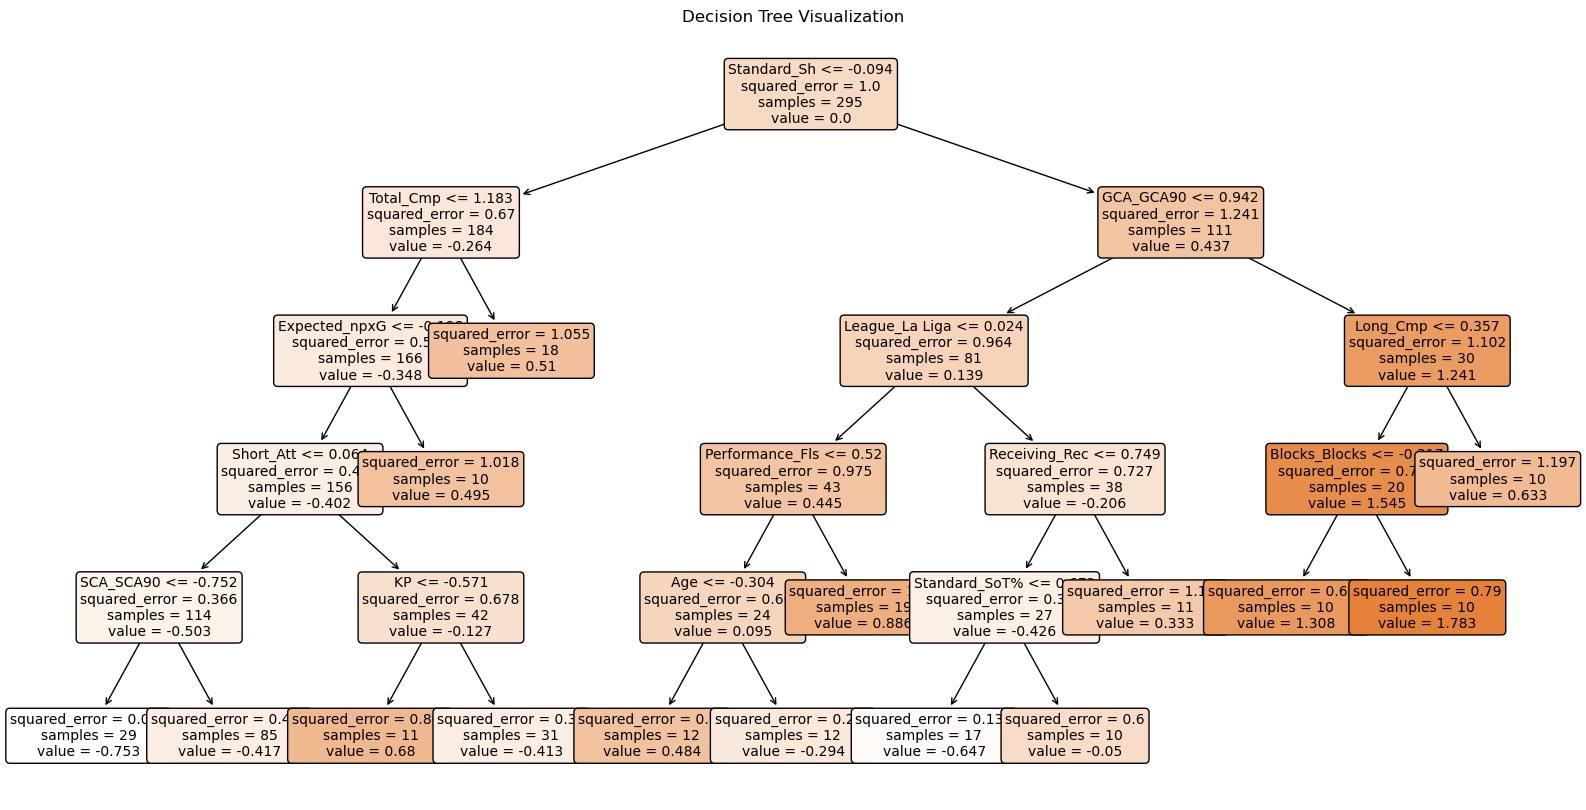

In [39]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=train_df_dropped_cols.columns,  # Use feature names from the dataset
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [40]:
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': train_df_no_outl_drop.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df[importance_df['Importance']>0]

,Feature,Importance
3,Standard_Sh,0.264004
51,GCA_GCA90,0.206399
19,Total_Cmp,0.092833
37,KP,0.075322
116,League_La Liga,0.066333
15,Expected_npxG,0.058622
99,Performance_Fls,0.051581
30,Long_Cmp,0.043061
94,Receiving_Rec,0.034908
25,Short_Att,0.033630


# Random forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

# No outliers

In [64]:
train_df, test_df = train_test_split(df_no_outlier, test_size=0.25, random_state=123)

dropped_columns = ['Market Value']

train_df_dropped_cols = train_df.drop(dropped_columns, axis=1)
train_arr = train_df_dropped_cols.to_numpy()
test_df_dropped_cols = test_df.drop(dropped_columns, axis=1)
test_arr = test_df_dropped_cols.to_numpy()

train_features_sc = StandardScaler()
train_features_norm = train_features_sc.fit_transform(train_arr)

test_features_norm = train_features_sc.transform(test_arr)

train_mktval = train_df['Market Value'].to_numpy().reshape(-1, 1)
test_mktval = test_df['Market Value'].to_numpy().reshape(-1, 1)
train_mktval_sc = StandardScaler()
train_mktval_norm = train_mktval_sc.fit_transform(train_mktval)
test_mktval_norm = train_mktval_sc.transform(test_mktval)

rf_regressor = RandomForestRegressor(random_state=22, n_estimators=100)
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [1, 3, 5],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(train_features_norm, train_mktval_norm.ravel())

# Best model and evaluation
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(test_features_norm)
rf_mse = mean_squared_error(test_mktval_norm, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(test_mktval_norm, rf_predictions)

train_pred=best_rf_model.predict(train_features_norm)
train_rmse=np.sqrt(mean_squared_error(train_mktval_norm, train_pred))

print("Best Parameters:", grid_search.best_params_)
print("Test RMSE:", rf_rmse)
print("Train RMSE:", train_rmse)
print("Test R2:", rf_r2)
print("Train R2:", r2_score(train_mktval_norm, train_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=1

In [65]:
feature_importances = best_rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': train_df_no_outl_drop.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df[importance_df['Importance']>0][:15]

,Feature,Importance
115,League_EPL,0.066550
116,League_La Liga,0.064443
15,Expected_npxG,0.048125
0,Age,0.042055
91,Carries_CPA,0.038947
...,...,...
41,PrgP,0.000320
103,Performance_Int,0.000200
110,Aerial Duels_Lost,0.000116
112,Pos_DF,0.000097


In [70]:
importance_df[importance_df['Importance']>0][:15]

,Feature,Importance
115,League_EPL,0.066550
116,League_La Liga,0.064443
15,Expected_npxG,0.048125
0,Age,0.042055
91,Carries_CPA,0.038947
90,Carries_1/3,0.032280
32,Long_Cmp%,0.031216
79,Touches_Att Pen,0.030519
3,Standard_Sh,0.029653
87,Carries_TotDist,0.026971


[CV] END max_depth=1, max_features=log2, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, max_features=l

# With outliers

In [66]:
train_df, test_df = train_test_split(data_pd, test_size=0.25, random_state=123)

dropped_columns = ['Unnamed: 0', 'Player', 'Nation', 'Squad', 'Market Value']

train_df_dropped_cols = train_df.drop(dropped_columns, axis=1)
train_arr = train_df_dropped_cols.to_numpy()
test_df_dropped_cols = test_df.drop(dropped_columns, axis=1)
test_arr = test_df_dropped_cols.to_numpy()

train_features_sc = StandardScaler()
train_features_norm = train_features_sc.fit_transform(train_arr)

test_features_norm = train_features_sc.transform(test_arr)

train_mktval = train_df['Market Value'].to_numpy().reshape(-1, 1)
test_mktval = test_df['Market Value'].to_numpy().reshape(-1, 1)
train_mktval_sc = StandardScaler()
train_mktval_norm = train_mktval_sc.fit_transform(train_mktval)
test_mktval_norm = train_mktval_sc.transform(test_mktval)


rf_regressor = RandomForestRegressor(random_state=22, n_estimators=100)
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [1, 3, 5],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(train_features_norm, train_mktval_norm.ravel())

# Best model and evaluation
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(test_features_norm)
rf_mse = mean_squared_error(test_mktval_norm, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(test_mktval_norm, rf_predictions)

train_pred=best_rf_model.predict(train_features_norm)
train_rmse=np.sqrt(mean_squared_error(train_mktval_norm, train_pred))

print("Best Parameters:", grid_search.best_params_)
print("Test RMSE:", rf_rmse)
print("Train RMSE:", train_rmse)
print("Test R2:", rf_r2)
print("Train R2:", r2_score(train_mktval_norm, train_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=5

In [53]:
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': train_df_no_outl_drop.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df[importance_df['Importance']>0]

,Feature,Importance
3,Standard_Sh,0.264004
51,GCA_GCA90,0.206399
19,Total_Cmp,0.092833
37,KP,0.075322
116,League_La Liga,0.066333
15,Expected_npxG,0.058622
99,Performance_Fls,0.051581
30,Long_Cmp,0.043061
94,Receiving_Rec,0.034908
25,Short_Att,0.033630


# Without normalizing

X, y = df_no_outlier.loc[:, ~df_no_outlier.columns.isin(['Market Value'])], df_no_outlier['Market Value']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 123)

dtr = DecisionTreeRegressor(random_state=123)

param_grid = {
    'max_depth': [3, 5, 10],          
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 5, 10],     
}

grid_search = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5,                              
    verbose=1,
    n_jobs=-1                          
)

grid_search.fit(train_X, train_y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

predictions = best_model.predict(test_X)
test_rmse = np.sqrt(mean_squared_error(test_y, predictions))

train_pred=best_model.predict(train_X)
train_rmse=np.sqrt(mean_squared_error(train_y, train_pred))

test_r2 = r2_score(test_y, predictions)
train_r2 = r2_score(train_y, train_pred)

print(f"Test RMSE: {test_rmse}")
print(f"Train RMSE: {train_rmse}")
print(f"Test R2: {test_r2}")
print(f"Train R2: {train_r2}")